# Isomap

In [127]:
import pandas as pd # importing pandas
import numpy as np # importing numpy
import matplotlib.pyplot as plt  # importing matplotlib
from sklearn.decomposition import KernelPCA #importing kernelpca
from sklearn.metrics import r2_score #importing r2 score
from sklearn.metrics import mean_squared_error

movie=pd.read_csv('ml360datasets/Movie_classification.csv') #reading the movie classification data
house=pd.read_csv('C:/Users/Administrator/Downloads/ml360datasets/kc_house.csv') # reading the house data
loan=pd.read_csv('C:/Users/Administrator/Downloads/ml360datasets/loan_classification.csv') #reading the loan classification
wine=pd.read_csv('C:/Users/Administrator/Downloads/ml360datasets/winequality-white.csv') #reading the wine data
iris=pd.read_csv('C:/Users/Administrator/Downloads/ml360datasets/Iris.csv') #reading the iris data
insurance=pd.read_csv('C:/Users/Administrator/Downloads/ml360datasets/insurance.csv') #reading the iris data

def null_replace(df): #define fun for replacing the null values
    for col in df.columns:
        if (df[col].dtypes == "object"): # checking the datatype
            df[col]=df[col].fillna(df[col].mode()[0]) #replacing the null values for catgeory column
        else:
            df[col]=df[col].fillna(df[col].mean()) # replacing the null values for numerical columns
    return df

def label_encoder(df): #define fun for label encoder 
    from sklearn.preprocessing import LabelEncoder #doing the labelencoder for category columns
    le = LabelEncoder() # giving variable for labelencoder
    for col in df.columns:  
        if (df[col].dtypes == "object"): #checking the data type of the column
            df[col] = df[col].astype(str) 
            df[col] = le.fit_transform(df[col]) #applying the label encoder
    return df #returns dataframe 


house=null_replace(house) #appying the function for replacing null values
loan=null_replace(loan)  #appying the function for replacing null values
wine=null_replace(wine)  #appying the function for replacing null values
movie=null_replace(movie) #appying the function for replacing null values
insurance=null_replace(insurance) #appying the function for replacing null values
iris=null_replace(iris) #appying the function for replacing null values

movie=label_encoder(movie) #appying the function for label encoder
house=label_encoder(house) #appying the function for label encoder
loan=label_encoder(loan) #appying the function for label encoder
wine=label_encoder(wine) #appying the function for label encoder
insurance=label_encoder(insurance) #appying the function for label encoder
iris=label_encoder(iris) #appying the function for label encoder

iris=iris.drop('Id',axis=1)

# Trying to optimize n_neighbors and n_components

In [ ]:
#N_components we are trying to identify by the cummulative varience explained. we are taking nearest value of 95(which occupies
#max variance). the nearest value of 95 variance that index point we are considering it has N_components

#n_neighbors we tried to find the K value by using KNearestneighbors to find the lowest error rate and for which ever  K value
#has lowest error rate we have choosen that has n_neighbors.
#the optimal value of k is np.sqrt(X.shape[0])/2 so we have to that value has maximum value and plot the error rate in that 
#rate we have choose the lowest error rate point 

In [ ]:
#It didnt work for some of regression data has when we tried to find the n_nighbors it has gave 0 has neighbors.
#isomap needs more than 0 has a n_neighbors 

# Movie

In [58]:
X=movie.drop('Start_Tech_Oscar',axis=1) #defining the X features
y=movie['Start_Tech_Oscar'] #defining target variable

In [59]:
from sklearn.preprocessing import StandardScaler #importing Standardscaler
sc = StandardScaler() #defining standardscaler
X= sc.fit_transform(X) #fiting and transforming X features

from sklearn.model_selection import train_test_split # importing the train test split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size= 0.30, random_state =42)

from sklearn.neighbors import KNeighborsClassifier # importing the Knn

In [60]:
k=np.sqrt(X.shape[0])/2 #optimal  value of k is square root of number of samples by 2

In [61]:
k=int(k) #converting the float to int

Minimum error:- 0.3881578947368421 at K = 8


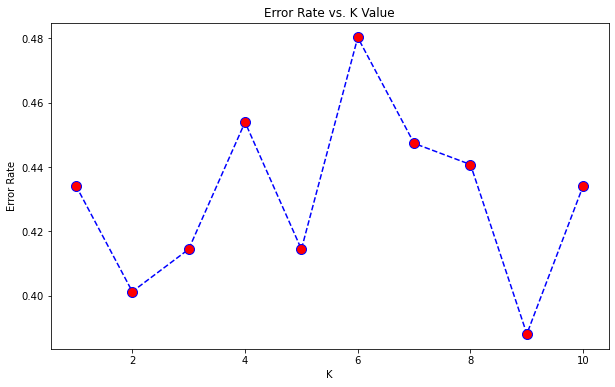

In [62]:
error_rate = [] #empty list  for error rate 
for i in range(1,k):
    knn = KNeighborsClassifier(n_neighbors=i) #defining KNN 
    knn.fit(X_train,y_train) #fiting the X anf y 
    pred_i = knn.predict(X_test) #predicting the X test 
    error_rate.append(np.mean(pred_i != y_test)) # calculating the difference between y test and prediction and appending to 
    #empty list 

plt.figure(figsize=(10,6)) #defining plot size 
plt.plot(range(1,k),error_rate,color='blue', linestyle='dashed', #plotting the error rate 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value') #title of the plot
plt.xlabel('K') #X label 
plt.ylabel('Error Rate') #Y label
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate))) 
#printing the min error rate and index of error rate
n_neighbors=error_rate.index(min(error_rate)) #storing the index has a n_neighbors

In [64]:
n_neighbors

8

Maximum accuracy:- 0.6118421052631579 at K = 8


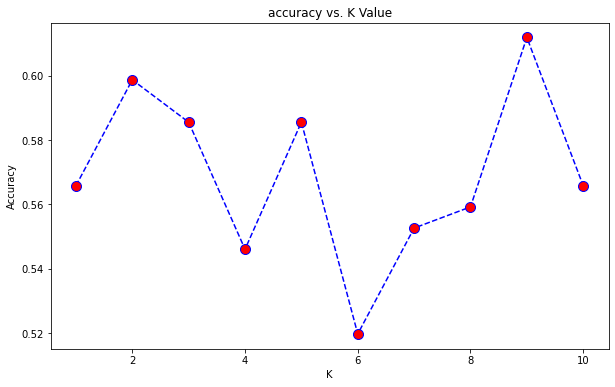

In [65]:
acc = [] #empty list for accuracy
# Will take some time
from sklearn import metrics #importing the metrics
for i in range(1,k):
    neigh = KNeighborsClassifier(n_neighbors = i).fit(X_train,y_train) #defining the KNN and fit nd transfrom X and y 
    yhat = neigh.predict(X_test) #predicting the X test 
    acc.append(metrics.accuracy_score(y_test, yhat)) #adding the accuracy for different n_neighbors to empty list 
    
plt.figure(figsize=(10,6))# defining the plot size
plt.plot(range(1,k),acc,color = 'blue',linestyle='dashed', #ploting the accuracy 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value') #plot title
plt.xlabel('K') #X label
plt.ylabel('Accuracy') #Y label
print("Maximum accuracy:-",max(acc),"at K =",acc.index(max(acc))) #checking the high accuracy index

In [66]:
from sklearn.manifold import Isomap #importing isomap

In [67]:
X=movie.drop('Start_Tech_Oscar',axis=1)# X matrix
y=movie['Start_Tech_Oscar'] # y target variable
from sklearn.preprocessing import StandardScaler #import standard scaler
sc = StandardScaler() #defining standardscaler
X= sc.fit_transform(X) #fit and transforming the X matrix

In [68]:
X_covariance_matrix = np.cov(X.T) # covariance of X matrix

eig_vals, eig_vecs = np.linalg.eig(X_covariance_matrix) #eigen values and eigen vectors

In [69]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
7.608777886942285
2.0299375526600563
1.1754367720650152
1.0507374886660894
0.9832716321115561
0.9540920102817364
0.9152602542753748
0.7970853004601267
0.7460821991695042
0.5593094029284356
0.3948892797085283
0.2820339657541051
0.2393478412578824
0.2130112854204131
0.07458444226626809
0.007721711255446677
0.0022047919882408444
0.0018597471453834361


In [70]:
tot = sum(eig_vals) #sum of eigen values
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)] #calculating the varience explained
cum_var_exp = np.cumsum(var_exp) #cummulative variance explained 
print ("Variance captured by each component is \n",var_exp)
print(40 * '-')
print ("Cumulative variance captured as we travel each component \n",cum_var_exp)

Variance captured by each component is 
 [42.187448758298764, 11.255143435368113, 6.517298747176463, 5.8258940686909835, 5.451824486345361, 5.290035849717573, 5.074730219686693, 4.419500183710625, 4.136709602334205, 3.101133602095518, 2.1894937006237005, 1.5637588131952458, 1.3270823433819776, 1.1810573027811653, 0.4135391232374326, 0.04281361642512702, 0.012224637176785525, 0.010311509754266958]
----------------------------------------
Cumulative variance captured as we travel each component 
 [ 42.18744876  53.44259219  59.95989094  65.78578501  71.2376095
  76.52764535  81.60237557  86.02187575  90.15858535  93.25971895
  95.44921265  97.01297147  98.34005381  99.52111111  99.93465024
  99.97746385  99.98968849 100.        ]


In [71]:
value=min(cum_var_exp, key=lambda x:abs(x-95)) #getting the nearest values of 95 in list 

In [72]:
iso = Isomap(n_components=list(cum_var_exp).index(value),n_neighbors=n_neighbors) #defining the isomap 
iso2_results = iso.fit_transform(X_train) #fit and transform X matrix 

In [73]:
columns=[] # empty list for columns
for i in range(iso2_results.shape[1]):
    columns.append('KPCA'+str(i)) # adding the columns name to list 
df=pd.DataFrame(iso2_results,columns=columns) #creating the dataframe with transformed isomap values
df['target']=y #adding the target variable

In [74]:
df #dataframe

,KPCA0,KPCA1,KPCA2,KPCA3,KPCA4,KPCA5,KPCA6,KPCA7,KPCA8,KPCA9,target
0,-4.972783,0.871277,-1.240951,-0.477149,1.565273,-0.142105,1.169366,-0.542049,0.082678,0.194297,1
1,0.982520,-1.196263,2.420351,-3.266409,0.293750,-1.309842,-0.379937,2.438595,-0.190214,-1.038180,0
2,-4.019476,-3.096499,0.124768,0.489518,-3.002535,-0.830592,-2.928293,0.173009,-1.878019,3.289959,1
3,-2.437245,-2.774995,1.711807,-3.131808,2.638688,0.501776,1.453801,2.034645,1.005967,-0.475654,1
4,3.980753,-3.052158,0.035578,-3.398120,0.220073,0.990032,-1.416955,0.055517,1.588712,0.526438,1
...,...,...,...,...,...,...,...,...,...,...,...
349,-0.187679,2.558779,-1.460274,0.101943,1.100403,4.444452,-1.400900,-0.123394,-0.196537,-0.154580,1
350,-3.143763,1.406262,-2.245843,-2.491184,0.223075,0.333461,0.189855,0.942892,0.601777,-2.319459,0
351,-9.563723,-0.179502,-2.899614,2.131262,0.018628,-1.951317,0.988171,0.411901,0.226559,-1.207919,1
352,7.392679,-3.265071,-0.545414,1.440995,2.414408,-0.780206,-0.458357,0.395004,-0.016519,1.605278,1


In [75]:
X=df.drop('target',axis=1) #defining X matrix
y=df['target'] #defining y target variable

In [76]:
from sklearn.model_selection import train_test_split #importing  the train and test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state =42)

In [77]:
from sklearn.ensemble import RandomForestClassifier  #importing the randomforest

In [78]:
classifier= RandomForestClassifier()  #defining the randomforest
classifier.fit(X_train, y_train) #fitting the X and y 
y_pred= classifier.predict(X_test) # predicting the X test 

In [79]:
from sklearn.metrics import classification_report #importing the Classification report
print(classification_report(y_test, y_pred)) #printing the classification report 

              precision    recall  f1-score   support

           0       0.54      0.54      0.54        46
           1       0.66      0.66      0.66        61

    accuracy                           0.61       107
   macro avg       0.60      0.60      0.60       107
weighted avg       0.61      0.61      0.61       107



# Loan

In [80]:
X=loan.drop('Loan_Status',axis=1) #defining the X features
y=loan['Loan_Status'] #defining target variable

In [81]:
from sklearn.preprocessing import StandardScaler #importing Standardscaler
sc = StandardScaler() #defining standardscaler
X= sc.fit_transform(X) #fiting and transforming X features

from sklearn.model_selection import train_test_split # importing the train test split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size= 0.30, random_state =42)

from sklearn.neighbors import KNeighborsClassifier # importing the Knn

In [82]:
k=np.sqrt(X.shape[0])/2 #optimal  value of k is square root of number of samples by 2

In [83]:
k=int(k) #converting the float to int

Minimum error:- 0.21621621621621623 at K = 7


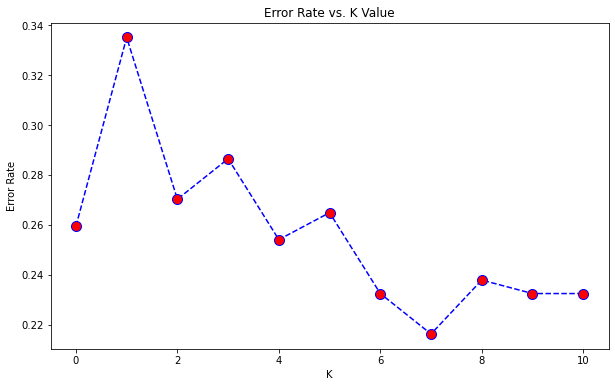

In [84]:
error_rate = [] #empty list  for error rate 
for i in range(1,k):
    knn = KNeighborsClassifier(n_neighbors=i) #defining KNN 
    knn.fit(X_train,y_train) #fiting the X anf y 
    pred_i = knn.predict(X_test) #predicting the X test 
    error_rate.append(np.mean(pred_i != y_test)) # calculating the difference between y test and prediction and appending to 
    #empty list 

plt.figure(figsize=(10,6)) #defining plot size 
plt.plot(range(0,k-1),error_rate,color='blue', linestyle='dashed', #plotting the error rate 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value') #title of the plot
plt.xlabel('K') #X label 
plt.ylabel('Error Rate') #Y label
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate))) 
#printing the min error rate and index of error rate
n_neighbors=error_rate.index(min(error_rate)) #storing the index has a n_neighbors

Maximum accuracy:- 0.7837837837837838 at K = 7


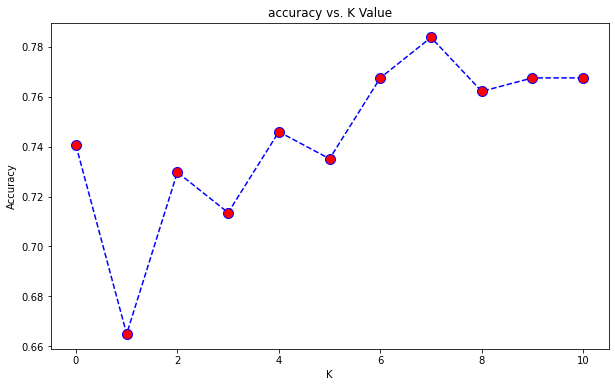

In [85]:
acc = [] #empty list for accuracy
# Will take some time
from sklearn import metrics #importing the metrics
for i in range(1,k):
    neigh = KNeighborsClassifier(n_neighbors = i).fit(X_train,y_train) #defining the KNN and fit nd transfrom X and y 
    yhat = neigh.predict(X_test) #predicting the X test 
    acc.append(metrics.accuracy_score(y_test, yhat)) #adding the accuracy for different n_neighbors to empty list 
    
plt.figure(figsize=(10,6))# defining the plot size
plt.plot(range(0,k-1),acc,color = 'blue',linestyle='dashed', #ploting the accuracy 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value') #plot title
plt.xlabel('K') #X label
plt.ylabel('Accuracy') #Y label
print("Maximum accuracy:-",max(acc),"at K =",acc.index(max(acc))) #checking the high accuracy index

In [86]:
from sklearn.manifold import Isomap #importing isomap

In [87]:
X=loan.drop('Loan_Status',axis=1) #defining the X features
y=loan['Loan_Status'] #defining target variable
from sklearn.preprocessing import StandardScaler #import standard scaler
sc = StandardScaler() #defining standardscaler
X= sc.fit_transform(X) #fit and transforming the X matrix

In [88]:
X_covariance_matrix = np.cov(X.T) # covariance of X matrix

eig_vals, eig_vecs = np.linalg.eig(X_covariance_matrix) #eigen values and eigen vectors

In [89]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
1.877924468532898
1.4699253273073658
1.2157590408759529
1.1120553242730453
1.0321142918098958
1.0006101203011
0.9200203535559071
0.8500777229614483
0.8329019050097859
0.7776069503161186
0.582637470004977
0.3479428814952241


In [90]:
tot = sum(eig_vals) #sum of eigen values
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)] #calculating the varience explained
cum_var_exp = np.cumsum(var_exp) #cummulative variance explained 
print ("Variance captured by each component is \n",var_exp)
print(40 * '-')
print ("Cumulative variance captured as we travel each component \n",cum_var_exp)

Variance captured by each component is 
 [15.623882996887438, 12.229427600969263, 10.114824810762203, 9.252034660414994, 8.586944365899377, 8.324837184372615, 7.654349575594069, 7.072443596299781, 6.929544893743198, 6.469504079041541, 4.847404575367141, 2.8948016606483766]
----------------------------------------
Cumulative variance captured as we travel each component 
 [ 15.623883    27.8533106   37.96813541  47.22017007  55.80711443
  64.13195162  71.78630119  78.85874479  85.78828968  92.25779376
  97.10519834 100.        ]


In [91]:
value=min(cum_var_exp, key=lambda x:abs(x-95)) #getting the nearest values of 95 in list 

In [92]:
iso = Isomap(n_components=list(cum_var_exp).index(value),n_neighbors=n_neighbors) #defining the isomap 
iso2_results = iso.fit_transform(X_train) #fit and transform X matrix 

In [93]:
columns=[] # empty list for columns
for i in range(iso2_results.shape[1]):
    columns.append('KPCA'+str(i)) # adding the columns name to list 
df=pd.DataFrame(iso2_results,columns=columns) #creating the dataframe with transformed isomap values
df['target']=y #adding the target variable

In [94]:
df #dataframe

,KPCA0,KPCA1,KPCA2,KPCA3,KPCA4,KPCA5,KPCA6,KPCA7,KPCA8,KPCA9,target
0,4.773448,-3.266769,-1.546031,5.752283,3.043845,-1.834883,-1.802493,1.920344,-1.859303,-0.057491,1
1,7.551746,-3.855967,-2.925584,0.426622,-3.218776,-1.569608,2.039334,2.938732,2.465808,0.437745,0
2,-2.080459,0.869634,-2.995088,-5.008702,2.100583,0.476219,0.487682,-0.434609,0.854218,0.836229,1
3,7.342183,-3.591722,-2.555946,0.130251,-2.720954,-1.708074,2.278510,2.445946,2.521791,0.983042,1
4,8.492418,-0.490217,-0.113836,-4.121084,2.085294,-0.455967,0.023898,1.308783,-1.062620,-1.631914,1
...,...,...,...,...,...,...,...,...,...,...,...
424,4.600158,-4.779336,4.650451,-0.549209,-0.541470,-5.411348,1.072374,-2.312816,-0.540921,-1.399101,1
425,-4.346636,0.583622,2.193300,0.027209,0.146527,-2.702030,-0.134013,-2.506411,-1.185769,-1.176841,1
426,3.340333,6.396195,1.040699,0.286054,-1.558152,0.269641,0.747220,-0.848307,-0.409873,0.408767,0
427,1.594973,2.168679,-3.314128,3.770533,-6.044308,2.198787,2.809274,-1.570679,-1.920506,0.113736,1


In [95]:
X=df.drop('target',axis=1) #defining X matrix
y=df['target'] #defining y target variable

In [96]:
from sklearn.model_selection import train_test_split #importing  the train and test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state =42)

In [97]:
from sklearn.ensemble import RandomForestClassifier  #importing the randomforest

In [98]:
classifier= RandomForestClassifier()  #defining the randomforest
classifier.fit(X_train, y_train) #fitting the X and y 
y_pred= classifier.predict(X_test) # predicting the X test 

In [99]:
from sklearn.metrics import classification_report #importing the Classification report
print(classification_report(y_test, y_pred)) #printing the classification report 

              precision    recall  f1-score   support

           0       0.26      0.11      0.15        46
           1       0.63      0.83      0.72        83

    accuracy                           0.57       129
   macro avg       0.45      0.47      0.43       129
weighted avg       0.50      0.57      0.51       129



# Iris

In [125]:
iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,2
146,147,6.3,2.5,5.0,1.9,2
147,148,6.5,3.0,5.2,2.0,2
148,149,6.2,3.4,5.4,2.3,2


In [129]:
X=iris.drop('Species',axis=1) #defining the X features
y=iris['Species'] #defining target variable

In [130]:
from sklearn.preprocessing import StandardScaler #importing Standardscaler
sc = StandardScaler() #defining standardscaler
X= sc.fit_transform(X) #fiting and transforming X features

from sklearn.model_selection import train_test_split # importing the train test split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size= 0.30, random_state =42)

from sklearn.neighbors import KNeighborsClassifier # importing the Knn

In [131]:
k=np.sqrt(X.shape[0])/2 #optimal  value of k is square root of number of samples by 2

In [132]:
k=int(k) #converting the float to int

Minimum error:- 0.0 at K = 2


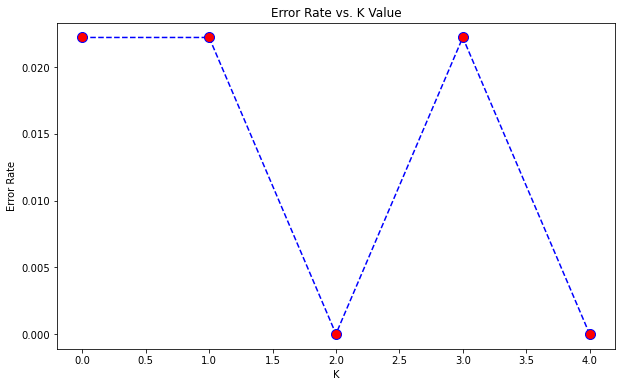

In [133]:
error_rate = [] #empty list  for error rate 
for i in range(1,k):
    knn = KNeighborsClassifier(n_neighbors=i) #defining KNN 
    knn.fit(X_train,y_train) #fiting the X anf y 
    pred_i = knn.predict(X_test) #predicting the X test 
    error_rate.append(np.mean(pred_i != y_test)) # calculating the difference between y test and prediction and appending to 
    #empty list 

plt.figure(figsize=(10,6)) #defining plot size 
plt.plot(range(0,k-1),error_rate,color='blue', linestyle='dashed', #plotting the error rate 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value') #title of the plot
plt.xlabel('K') #X label 
plt.ylabel('Error Rate') #Y label
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate))) 
#printing the min error rate and index of error rate
n_neighbors=error_rate.index(min(error_rate)) #storing the index has a n_neighbors

Maximum accuracy:- 1.0 at K = 2


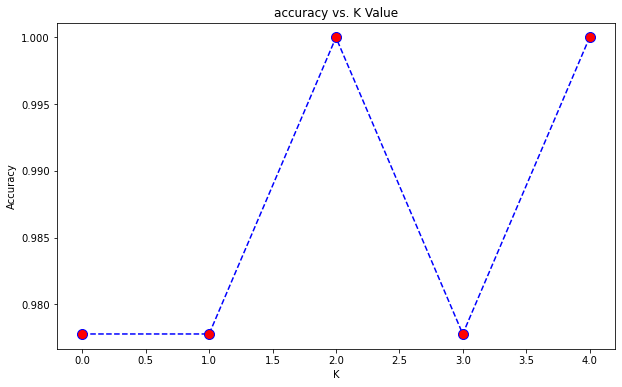

In [134]:
acc = [] #empty list for accuracy
# Will take some time
from sklearn import metrics #importing the metrics
for i in range(1,k):
    neigh = KNeighborsClassifier(n_neighbors = i).fit(X_train,y_train) #defining the KNN and fit nd transfrom X and y 
    yhat = neigh.predict(X_test) #predicting the X test 
    acc.append(metrics.accuracy_score(y_test, yhat)) #adding the accuracy for different n_neighbors to empty list 
    
plt.figure(figsize=(10,6))# defining the plot size
plt.plot(range(0,k-1),acc,color = 'blue',linestyle='dashed', #ploting the accuracy 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value') #plot title
plt.xlabel('K') #X label
plt.ylabel('Accuracy') #Y label
print("Maximum accuracy:-",max(acc),"at K =",acc.index(max(acc))) #checking the high accuracy index

In [135]:
from sklearn.manifold import Isomap #importing isomap

In [136]:
X=loan.drop('Loan_Status',axis=1) #defining the X features
y=loan['Loan_Status'] #defining target variable
from sklearn.preprocessing import StandardScaler #import standard scaler
sc = StandardScaler() #defining standardscaler
X= sc.fit_transform(X) #fit and transforming the X matrix

In [137]:
X_covariance_matrix = np.cov(X.T) # covariance of X matrix

eig_vals, eig_vecs = np.linalg.eig(X_covariance_matrix) #eigen values and eigen vectors

In [138]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
1.877924468532898
1.4699253273073658
1.2157590408759529
1.1120553242730453
1.0321142918098958
1.0006101203011
0.9200203535559071
0.8500777229614483
0.8329019050097859
0.7776069503161186
0.582637470004977
0.3479428814952241


In [139]:
tot = sum(eig_vals) #sum of eigen values
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)] #calculating the varience explained
cum_var_exp = np.cumsum(var_exp) #cummulative variance explained 
print ("Variance captured by each component is \n",var_exp)
print(40 * '-')
print ("Cumulative variance captured as we travel each component \n",cum_var_exp)

Variance captured by each component is 
 [15.623882996887438, 12.229427600969263, 10.114824810762203, 9.252034660414994, 8.586944365899377, 8.324837184372615, 7.654349575594069, 7.072443596299781, 6.929544893743198, 6.469504079041541, 4.847404575367141, 2.8948016606483766]
----------------------------------------
Cumulative variance captured as we travel each component 
 [ 15.623883    27.8533106   37.96813541  47.22017007  55.80711443
  64.13195162  71.78630119  78.85874479  85.78828968  92.25779376
  97.10519834 100.        ]


In [140]:
value=min(cum_var_exp, key=lambda x:abs(x-95)) #getting the nearest values of 95 in list 

In [141]:
iso = Isomap(n_components=list(cum_var_exp).index(value),n_neighbors=n_neighbors) #defining the isomap 
iso2_results = iso.fit_transform(X_train) #fit and transform X matrix 

In [142]:
columns=[] # empty list for columns
for i in range(iso2_results.shape[1]):
    columns.append('KPCA'+str(i)) # adding the columns name to list 
df=pd.DataFrame(iso2_results,columns=columns) #creating the dataframe with transformed isomap values
df['target']=y #adding the target variable

In [143]:
df #dataframe

,KPCA0,KPCA1,KPCA2,KPCA3,KPCA4,KPCA5,KPCA6,KPCA7,KPCA8,KPCA9,target
0,-4.145681,1.559068,0.047178,0.675778,-0.006655,-0.193158,0.033476,-0.004777,0.680881,-0.226705,1
1,-1.278668,-1.316326,0.179610,-0.377899,0.001672,-0.049931,0.061064,-0.013468,-0.373939,0.069550,0
2,1.706798,-0.910153,-0.607965,-0.418469,0.000206,-0.512655,0.042709,-0.035974,0.032805,-0.124612,1
3,-0.391622,-1.103047,-0.404507,-0.599697,0.001165,-0.325660,0.135566,-0.038332,-0.046950,-0.108236,1
4,3.880232,-0.338234,-1.102463,1.490349,-0.002372,0.858961,1.312992,-0.141743,-0.029103,-0.029760,1
...,...,...,...,...,...,...,...,...,...,...,...
100,-1.022228,-1.018407,-0.420969,-0.748772,0.004443,-0.089281,0.080228,-0.024264,0.060492,-0.095743,1
101,-4.144899,2.139665,-0.594850,0.399841,-0.005036,-0.471161,0.137167,-0.044531,0.134705,0.730512,1
102,0.258651,0.440627,0.184176,0.145952,-0.013878,0.059480,-0.021174,0.047030,-0.003983,0.000406,1
103,-3.297741,1.178864,-0.907555,-0.352679,0.002613,0.193111,-0.063355,0.016786,-0.465072,-0.272515,1


In [144]:
X=df.drop('target',axis=1) #defining X matrix
y=df['target'] #defining y target variable

In [145]:
from sklearn.model_selection import train_test_split #importing  the train and test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state =42)

In [146]:
from sklearn.ensemble import RandomForestClassifier  #importing the randomforest

In [147]:
classifier= RandomForestClassifier()  #defining the randomforest
classifier.fit(X_train, y_train) #fitting the X and y 
y_pred= classifier.predict(X_test) # predicting the X test 

In [148]:
from sklearn.metrics import classification_report #importing the Classification report
print(classification_report(y_test, y_pred)) #printing the classification report 

              precision    recall  f1-score   support

           0       0.36      0.45      0.40        11
           1       0.67      0.57      0.62        21

    accuracy                           0.53        32
   macro avg       0.51      0.51      0.51        32
weighted avg       0.56      0.53      0.54        32



--------------------------------------------------------------------------------------------------------------------------------

# wine

In [203]:
X=wine.drop('quality',axis=1) #defining the X features
y=wine['quality'] #defining target variable

In [204]:
from sklearn.preprocessing import StandardScaler #importing Standardscaler
sc = StandardScaler() #defining standardscaler
X= sc.fit_transform(X) #fiting and transforming X features

from sklearn.model_selection import train_test_split # importing the train test split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size= 0.30, random_state =42)

from sklearn.neighbors import KNeighborsClassifier # importing the Knn

In [205]:
k=np.sqrt(X.shape[0])/2 #optimal  value of k is square root of number of samples by 2

In [206]:
k=int(k) #converting the float to int

Minimum error:- 0.38639455782312926 at K = 0


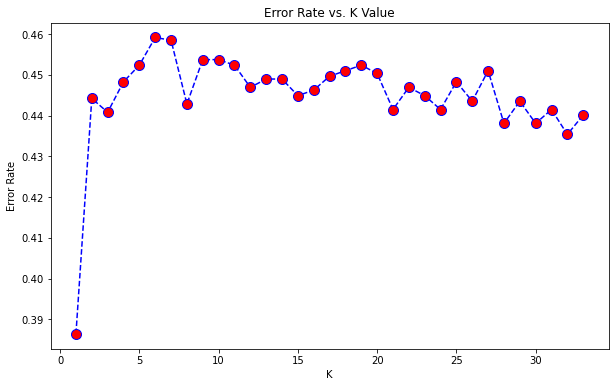

In [208]:
error_rate = [] #empty list  for error rate 
for i in range(1,k):
    knn = KNeighborsClassifier(n_neighbors=i) #defining KNN 
    knn.fit(X_train,y_train) #fiting the X anf y 
    pred_i = knn.predict(X_test) #predicting the X test 
    error_rate.append(np.mean(pred_i != y_test)) # calculating the difference between y test and prediction and appending to 
    #empty list 

plt.figure(figsize=(10,6)) #defining plot size 
plt.plot(range(0,k-1),error_rate,color='blue', linestyle='dashed', #plotting the error rate 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value') #title of the plot
plt.xlabel('K') #X label 
plt.ylabel('Error Rate') #Y label
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate))) 
#printing the min error rate and index of error rate
n_neighbors=error_rate.index(min(error_rate)) #storing the index has a n_neighbors

Maximum accuracy:- 0.6136054421768707 at K = 0


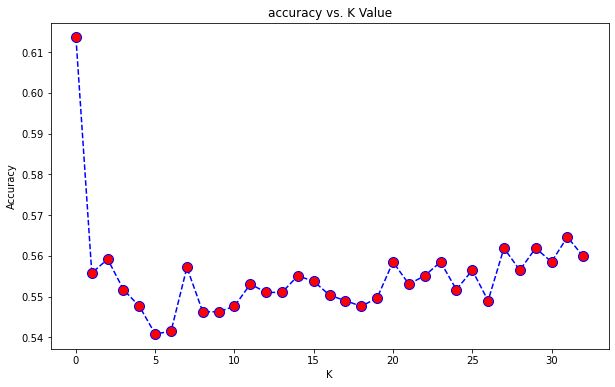

In [105]:
acc = [] #empty list for accuracy
# Will take some time
from sklearn import metrics #importing the metrics
for i in range(1,k):
    neigh = KNeighborsClassifier(n_neighbors = i).fit(X_train,y_train) #defining the KNN and fit nd transfrom X and y 
    yhat = neigh.predict(X_test) #predicting the X test 
    acc.append(metrics.accuracy_score(y_test, yhat)) #adding the accuracy for different n_neighbors to empty list 
    
plt.figure(figsize=(10,6))# defining the plot size
plt.plot(range(0,k-1),acc,color = 'blue',linestyle='dashed', #ploting the accuracy 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value') #plot title
plt.xlabel('K') #X label
plt.ylabel('Accuracy') #Y label
print("Maximum accuracy:-",max(acc),"at K =",acc.index(max(acc))) #checking the high accuracy index

In [106]:
from sklearn.manifold import Isomap #importing isomap

In [107]:
X=wine.drop('quality',axis=1) #defining the X features
y=wine['quality'] #defining target variable
from sklearn.preprocessing import StandardScaler #import standard scaler
sc = StandardScaler() #defining standardscaler
X= sc.fit_transform(X) #fit and transforming the X matrix

In [108]:
X_covariance_matrix = np.cov(X.T) # covariance of X matrix

eig_vals, eig_vecs = np.linalg.eig(X_covariance_matrix) #eigen values and eigen vectors

In [109]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
3.2229118963258814
1.5755616055612232
1.221920813273631
1.0187303437162085
0.9735333410682124
0.9389332087004115
0.726746399102888
0.5994808726333939
0.41422823663856523
0.28954625376935966
0.020653302438734145


In [110]:
tot = sum(eig_vals) #sum of eigen values
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)] #calculating the varience explained
cum_var_exp = np.cumsum(var_exp) #cummulative variance explained 
print ("Variance captured by each component is \n",var_exp)
print(40 * '-')
print ("Cumulative variance captured as we travel each component \n",cum_var_exp)

Variance captured by each component is 
 [29.29321718754935, 14.320363009824618, 11.106103089574539, 9.259294133372196, 8.84849617879475, 8.534013740313142, 6.605436572268536, 5.448713451289449, 3.7649424158637173, 2.6317012597137124, 0.18771896143598701]
----------------------------------------
Cumulative variance captured as we travel each component 
 [ 29.29321719  43.6135802   54.71968329  63.97897742  72.8274736
  81.36148734  87.96692391  93.41563736  97.18057978  99.81228104
 100.        ]


In [111]:
value=min(cum_var_exp, key=lambda x:abs(x-95)) #getting the nearest values of 95 in list 

In [112]:
iso = Isomap(n_components=list(cum_var_exp).index(value),n_neighbors=n_neighbors) #defining the isomap 
iso2_results = iso.fit_transform(X_train) #fit and transform X matrix 

ValueError: Expected n_neighbors > 0. Got 0

In [ ]:
columns=[] # empty list for columns
for i in range(iso2_results.shape[1]):
    columns.append('KPCA'+str(i)) # adding the columns name to list 
df=pd.DataFrame(iso2_results,columns=columns) #creating the dataframe with transformed isomap values
df['target']=y #adding the target variable

In [ ]:
df #dataframe

In [ ]:
X=df.drop('target',axis=1) #defining X matrix
y=df['target'] #defining y target variable

In [ ]:
from sklearn.model_selection import train_test_split #importing  the train and test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state =42)

In [ ]:
from sklearn.ensemble import RandomForestRegressor  #importing the randomforest

In [ ]:
classifier= RandomForestRegressor()  #defining the randomforest
classifier.fit(X_train, y_train) #fitting the X and y 
y_pred= classifier.predict(X_test) # predicting the X test 

In [ ]:
from sklearn.metrics import r2_score #importing the Classification report
print(r2_score(y_test, y_pred)) #printing the classification report 

# House

In [39]:
X=house.drop('sqft_lot15',axis=1) #defining the X features
y=house['sqft_lot15'] #defining target variable

In [40]:
from sklearn.preprocessing import StandardScaler #importing Standardscaler
sc = StandardScaler() #defining standardscaler
X= sc.fit_transform(X) #fiting and transforming X features

from sklearn.model_selection import train_test_split # importing the train test split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size= 0.30, random_state =42)

from sklearn.neighbors import KNeighborsClassifier # importing the Knn

In [41]:
k=np.sqrt(X.shape[0])/2 #optimal  value of k is square root of number of samples by 2

In [42]:
k=int(k) #converting the float to int

Minimum error:- 0.9433333333333334 at K = 0


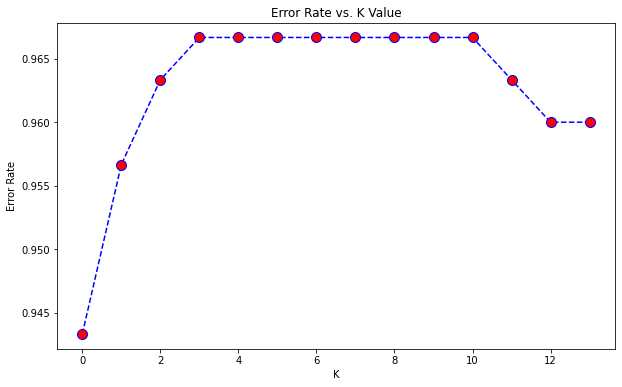

In [43]:
error_rate = [] #empty list  for error rate 
for i in range(1,k):
    knn = KNeighborsClassifier(n_neighbors=i) #defining KNN 
    knn.fit(X_train,y_train) #fiting the X anf y 
    pred_i = knn.predict(X_test) #predicting the X test 
    error_rate.append(np.mean(pred_i != y_test)) # calculating the difference between y test and prediction and appending to 
    #empty list 

plt.figure(figsize=(10,6)) #defining plot size 
plt.plot(range(0,k-1),error_rate,color='blue', linestyle='dashed', #plotting the error rate 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value') #title of the plot
plt.xlabel('K') #X label 
plt.ylabel('Error Rate') #Y label
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate))) 
#printing the min error rate and index of error rate
n_neighbors=error_rate.index(min(error_rate)) #storing the index has a n_neighbors

Maximum accuracy:- 0.056666666666666664 at K = 0


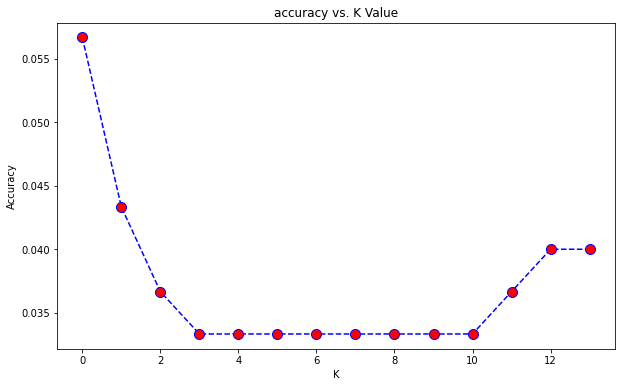

In [44]:
acc = [] #empty list for accuracy
# Will take some time
from sklearn import metrics #importing the metrics
for i in range(1,k):
    neigh = KNeighborsClassifier(n_neighbors = i).fit(X_train,y_train) #defining the KNN and fit nd transfrom X and y 
    yhat = neigh.predict(X_test) #predicting the X test 
    acc.append(metrics.accuracy_score(y_test, yhat)) #adding the accuracy for different n_neighbors to empty list 
    
plt.figure(figsize=(10,6))# defining the plot size
plt.plot(range(0,k-1),acc,color = 'blue',linestyle='dashed', #ploting the accuracy 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value') #plot title
plt.xlabel('K') #X label
plt.ylabel('Accuracy') #Y label
print("Maximum accuracy:-",max(acc),"at K =",acc.index(max(acc))) #checking the high accuracy index

In [45]:
from sklearn.manifold import Isomap #importing isomap

In [46]:
X=house.drop('sqft_lot15',axis=1) #defining the X features
y=house['sqft_lot15'] #defining target variable
from sklearn.preprocessing import StandardScaler #import standard scaler
sc = StandardScaler() #defining standardscaler
X= sc.fit_transform(X) #fit and transforming the X matrix

In [47]:
X_covariance_matrix = np.cov(X.T) # covariance of X matrix

eig_vals, eig_vecs = np.linalg.eig(X_covariance_matrix) #eigen values and eigen vectors

In [48]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
6.020495662835258
2.329567675302628
1.4865161554871462
1.3605944796692102
1.158043038137213
1.0482509583989883
0.9101276213223235
0.8033577813286842
0.7389585234555199
0.619345429610448
0.5614038555913701
0.4634846866537573
0.40332200080321723
0.30839941644862895
0.2859994049590644
0.21085799977606093
0.17228395165648758
0.13802943471631052
1.5813596298711607e-16


In [49]:
tot = sum(eig_vals) #sum of eigen values
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)] #calculating the varience explained
cum_var_exp = np.cumsum(var_exp) #cummulative variance explained 
print ("Variance captured by each component is \n",var_exp)
print(40 * '-')
print ("Cumulative variance captured as we travel each component \n",cum_var_exp)

Variance captured by each component is 
 [31.655100740264388, 12.248609345935519, 7.81593763856578, 7.153855385437388, 6.088862294193866, 5.511587674422788, 4.7853504350649505, 4.223966417817956, 3.8853622380728536, 3.256449811660221, 2.951799419841878, 2.4369512527287784, 2.1206225004036168, 1.6215300438108184, 1.5037532593074445, 1.1086680563537676, 0.9058499749916994, 0.7257435111262726, 8.314614143677452e-16]
----------------------------------------
Cumulative variance captured as we travel each component 
 [ 31.65510074  43.90371009  51.71964772  58.87350311  64.9623654
  70.47395308  75.25930351  79.48326993  83.36863217  86.62508198
  89.5768814   92.01383265  94.13445515  95.7559852   97.25973846
  98.36840651  99.27425649 100.         100.        ]


In [50]:
value=min(cum_var_exp, key=lambda x:abs(x-95)) #getting the nearest values of 95 in list 

In [52]:
iso = Isomap(n_components=list(cum_var_exp).index(value),n_neighbors=n_neighbors) #defining the isomap 
iso2_results = iso.fit_transform(X_train) #fit and transform X matrix 

ValueError: Expected n_neighbors > 0. Got 0

In [ ]:
columns=[] # empty list for columns
for i in range(iso2_results.shape[1]):
    columns.append('KPCA'+str(i)) # adding the columns name to list 
df=pd.DataFrame(iso2_results,columns=columns) #creating the dataframe with transformed isomap values
df['target']=y #adding the target variable

In [ ]:
df #dataframe

In [ ]:
X=df.drop('target',axis=1) #defining X matrix
y=df['target'] #defining y target variable

In [ ]:
from sklearn.model_selection import train_test_split #importing  the train and test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state =42)

In [ ]:
from sklearn.ensemble import RandomForestRegressor  #importing the randomforest

In [ ]:
classifier= RandomForestRegressor()  #defining the randomforest
classifier.fit(X_train, y_train) #fitting the X and y 
y_pred= classifier.predict(X_test) # predicting the X test 

In [ ]:
from sklearn.metrics import r2_score #importing the Classification report
print(r2_score(y_test, y_pred)) #printing the classification report 

# Insurance

In [161]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int32  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int32  
 5   region    1338 non-null   int32  
 6   charges   1338 non-null   float64
dtypes: float64(2), int32(3), int64(2)
memory usage: 57.6 KB


In [156]:
X=insurance.drop('charges',axis=1) #defining the X features
y=insurance['charges'] #defining target variable

In [170]:
y=y.astype(int)

In [171]:
from sklearn.preprocessing import StandardScaler #importing Standardscaler
sc = StandardScaler() #defining standardscaler
X= sc.fit_transform(X) #fiting and transforming X features

from sklearn.model_selection import train_test_split # importing the train test split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size= 0.30, random_state =42)

from sklearn.neighbors import KNeighborsClassifier # importing the Knn

In [173]:
k=np.sqrt(X.shape[0])/2 #optimal  value of k is square root of number of samples by 2

In [174]:
k=int(k) #converting the float to int

Minimum error:- 0.9776119402985075 at K = 1


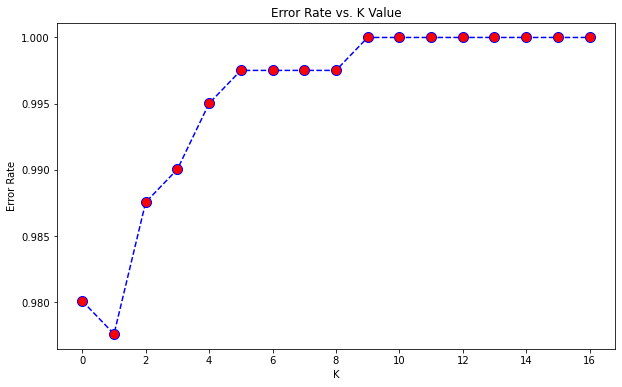

In [175]:
error_rate = [] #empty list  for error rate 
for i in range(1,k):
    knn = KNeighborsClassifier(n_neighbors=i) #defining KNN 
    knn.fit(X_train,y_train) #fiting the X anf y 
    pred_i = knn.predict(X_test) #predicting the X test 
    error_rate.append(np.mean(pred_i != y_test)) # calculating the difference between y test and prediction and appending to 
    #empty list 

plt.figure(figsize=(10,6)) #defining plot size 
plt.plot(range(0,k-1),error_rate,color='blue', linestyle='dashed', #plotting the error rate 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value') #title of the plot
plt.xlabel('K') #X label 
plt.ylabel('Error Rate') #Y label
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate))) 
#printing the min error rate and index of error rate
n_neighbors=error_rate.index(min(error_rate)) #storing the index has a n_neighbors

Maximum accuracy:- 0.022388059701492536 at K = 1


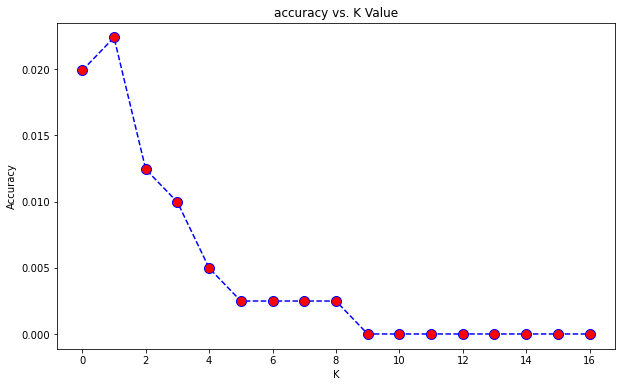

In [176]:
acc = [] #empty list for accuracy
# Will take some time
from sklearn import metrics #importing the metrics
for i in range(1,k):
    neigh = KNeighborsClassifier(n_neighbors = i).fit(X_train,y_train) #defining the KNN and fit nd transfrom X and y 
    yhat = neigh.predict(X_test) #predicting the X test 
    acc.append(metrics.accuracy_score(y_test, yhat)) #adding the accuracy for different n_neighbors to empty list 
    
plt.figure(figsize=(10,6))# defining the plot size
plt.plot(range(0,k-1),acc,color = 'blue',linestyle='dashed', #ploting the accuracy 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value') #plot title
plt.xlabel('K') #X label
plt.ylabel('Accuracy') #Y label
print("Maximum accuracy:-",max(acc),"at K =",acc.index(max(acc))) #checking the high accuracy index

In [188]:
from sklearn.manifold import Isomap #importing isomap

In [189]:
X=insurance.drop('charges',axis=1) #defining the X features
y=insurance['charges'] #defining target variable
from sklearn.preprocessing import StandardScaler #import standard scaler
sc = StandardScaler() #defining standardscaler
X= sc.fit_transform(X) #fit and transforming the X matrix

In [190]:
X_covariance_matrix = np.cov(X.T) # covariance of X matrix

eig_vals, eig_vecs = np.linalg.eig(X_covariance_matrix) #eigen values and eigen vectors

In [191]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
1.2045187877036263
1.0890123243406318
1.0203013779954038
0.9659841007575616
0.9246565384020835
0.8000145297386191


In [192]:
tot = sum(eig_vals) #sum of eigen values
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)] #calculating the varience explained
cum_var_exp = np.cumsum(var_exp) #cummulative variance explained 
print ("Variance captured by each component is \n",var_exp)
print(40 * '-')
print ("Cumulative variance captured as we travel each component \n",cum_var_exp)

Variance captured by each component is 
 [20.060309157445776, 18.136640229738703, 16.992313681861653, 16.087702325770536, 15.399424412600704, 13.323610192582619]
----------------------------------------
Cumulative variance captured as we travel each component 
 [ 20.06030916  38.19694939  55.18926307  71.27696539  86.67638981
 100.        ]


In [193]:
value=min(cum_var_exp, key=lambda x:abs(x-95)) #getting the nearest values of 95 in list 

In [194]:
iso = Isomap(n_components=list(cum_var_exp).index(value),n_neighbors=n_neighbors) #defining the isomap 
iso2_results = iso.fit_transform(X_train) #fit and transform X matrix 

In [195]:
columns=[] # empty list for columns
for i in range(iso2_results.shape[1]):
    columns.append('KPCA'+str(i)) # adding the columns name to list 
df=pd.DataFrame(iso2_results,columns=columns) #creating the dataframe with transformed isomap values
df['target']=y #adding the target variable

In [196]:
df #dataframe

,KPCA0,KPCA1,KPCA2,KPCA3,KPCA4,target
0,0.006351,0.001548,-0.001278,-0.001646,0.006056,16884.92400
1,0.006351,0.001548,-0.001278,-0.001646,0.006056,1725.55230
2,0.006351,0.001548,-0.001278,-0.001646,0.006056,4449.46200
3,0.006351,0.001548,-0.001278,-0.001646,0.006056,21984.47061
4,0.006351,0.001548,-0.001278,-0.001646,0.006056,3866.85520
...,...,...,...,...,...,...
650,0.006351,0.001548,-0.001278,-0.001646,0.006056,9800.88820
651,0.006351,0.001548,-0.001278,-0.001646,0.006056,10579.71100
652,0.006351,0.001548,-0.001278,-0.001646,0.006056,8280.62270
653,-0.000796,-0.000938,0.001032,0.001733,-0.055057,8527.53200


In [197]:
X=df.drop('target',axis=1) #defining X matrix
y=df['target'] #defining y target variable

In [198]:
from sklearn.model_selection import train_test_split #importing  the train and test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state =42)

In [199]:
from sklearn.ensemble import RandomForestRegressor  #importing the randomforest

In [200]:
classifier= RandomForestRegressor()  #defining the randomforest
classifier.fit(X_train, y_train) #fitting the X and y 
y_pred= classifier.predict(X_test) # predicting the X test 

In [201]:
from sklearn.metrics import r2_score #importing the Classification report
print(r2_score(y_test, y_pred)) #printing the classification report 

-0.014318035418264152
